# Hoja de Trabajo 1
### Christopher Sandoval 13660

In [3]:
import numpy as np
from matplotlib import pyplot as plt

Se definen las funciones de costo, derivada de costo y deciente al gradiente.

In [4]:
def linear_cost(X, y, theta, lambd):
    m, _ = X.shape
    h = np.matmul(X, theta)
    sq = (y - h) ** 2
    return (sq.sum() + np.sum(lambd*(theta**2))) / (2 * m)

In [5]:
def linear_cost_derivate(X, y, theta, lambd):
    h = np.matmul(X, theta)
    m, _ = X.shape
    r = (lambd/m)*theta.sum()
    return (np.matmul((h - y).T, X).T + r) / m

In [6]:
def gradient_descent(
        X,
        y,
        theta_0,
        cost,
        cost_derivate,
        alpha=0.01,
        treshold=0.0001,
        max_iter=10000,
        lambd=0.5):
    theta, i = theta_0, 0
    costs = []
    gradient_norms = []
    while np.linalg.norm(cost_derivate(X, y, theta, lambd)) > treshold and i < max_iter:
        theta -= alpha * cost_derivate(X, y, theta, lambd)
        i += 1
        costs.append(cost(X, y, theta, lambd))
        gradient_norms.append(cost_derivate(X, y, theta, lambd))
    return theta, costs, gradient_norms

## Análisis exploratorio

Para empezar se hara un analisis exploratorio de todas las variables para saber su relación con la posibilidad de admisión. Esto nos ayudará más adelante para saber que variables son las más útiles para realizar un modelo de predicción.

In [8]:
my_data = np.genfromtxt('Admission_Predict.csv', delimiter=',', skip_header=1)
GRE_Score = np.array(my_data[:, 1])
TOEFL_Score = np.array(my_data[:, 2])
University_Rating = np.array(my_data[:, 3])
SOP = np.array(my_data[:, 4])
LOR = np.array(my_data[:, 5])
CGPA = np.array(my_data[:, 6])
Research = np.array(my_data[:, 7])
Chance_of_Admit = np.array(my_data[:, 8])

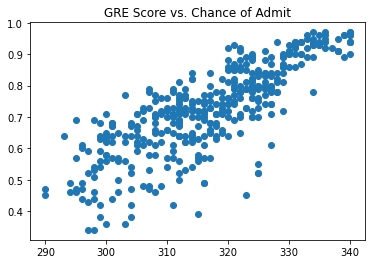

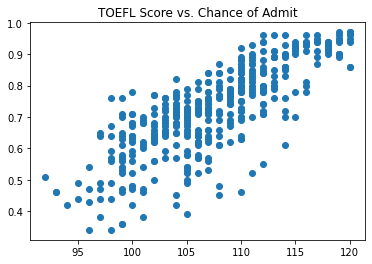

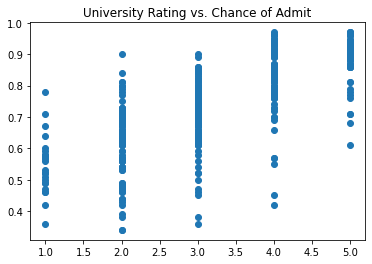

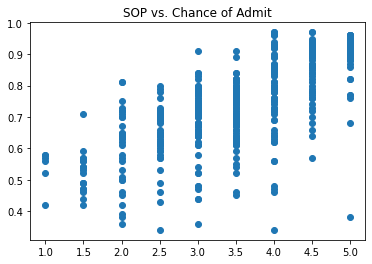

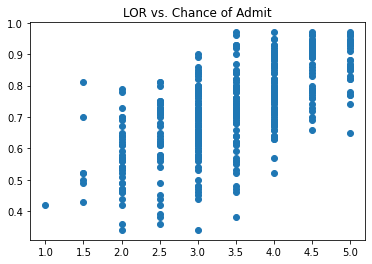

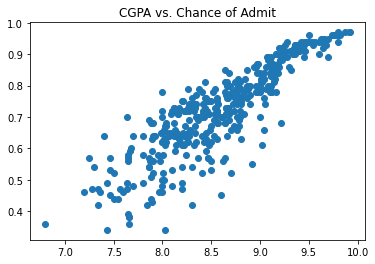

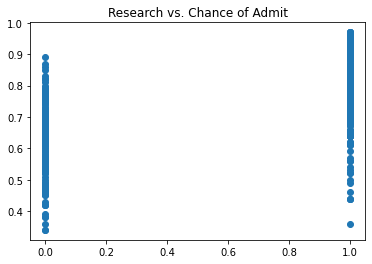

In [42]:
plt.scatter(GRE_Score, Chance_of_Admit)
plt.title("GRE Score vs. Chance of Admit")
plt.show()
plt.scatter(TOEFL_Score, Chance_of_Admit)
plt.title("TOEFL Score vs. Chance of Admit")
plt.show()
plt.scatter(University_Rating, Chance_of_Admit)
plt.title("University Rating vs. Chance of Admit")
plt.show()
plt.scatter(SOP, Chance_of_Admit)
plt.title("SOP vs. Chance of Admit")
plt.show()
plt.scatter(LOR, Chance_of_Admit)
plt.title("LOR vs. Chance of Admit")
plt.show()
plt.scatter(CGPA, Chance_of_Admit)
plt.title("CGPA vs. Chance of Admit")
plt.show()
plt.scatter(Research, Chance_of_Admit)
plt.title("Research vs. Chance of Admit")
plt.show()

Podemos observar en las gráficas que solo tres de las variables parecen tener una relación lineal con la probabilidad de admisión. Estas son el GRE Score, TOEFL Score y CGPA. A continuación se probará hacer un modelo de predicción para cada una de estas variables.

## Modelos de una variable

Para iniciar se haran modelos con cada una de las variables que tienen una relación lineal y se comparará la eficacia entre ellos para ver si las variables son capaces de hacer una predicción cercana al set de entrenamiento.

In [2]:
# Se dividiran los datos de la siguiente forma
TRAINING = 240
TEST = 80
CROSS = 80

### Modelo con variable GRE

In [47]:
y = Chance_of_Admit[:TRAINING]
y = y.reshape(TRAINING,1)

X = GRE_Score[:TRAINING]
X = np.vstack(
    (
        np.ones(TRAINING), 
        X,
        (X**2)/1000 # Se agrego esta variable para darle más precisión al modelo
    )
).T

THETA: [[ 0.29434649]
 [-0.00750377]
 [ 0.0278955 ]]


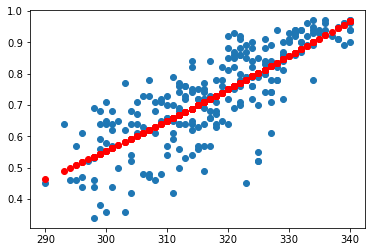

In [48]:
m, n = X.shape
theta_0 = np.random.rand(n, 1)
theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.00001,
    treshold=0.0001,
    max_iter=300000,
    lambd=10
)

print('THETA:', theta)

y_pred = np.matmul(X, theta)

plt.scatter(X[:, 1], y)
plt.scatter(X[:, 1], y_pred, color='red')

plt.show()

Podemos observar que se consiguió un modelo que predice cercanamente al set de datos con una función cuadrática. No se observó ningun beneficio al elevar más el grado del modelo.

### Modelo con variable TOEFL

In [49]:
y = Chance_of_Admit[:TRAINING]
y = y.reshape(TRAINING,1)

X = TOEFL_Score[:TRAINING]
X = np.vstack(
    (
        np.ones(TRAINING), 
        X,
        (X**2)/1000 # Se agrego esta variable para darle más precisión al modelo
    )
).T

THETA: [[ 0.89366653]
 [-0.03141947]
 [ 0.27496913]]


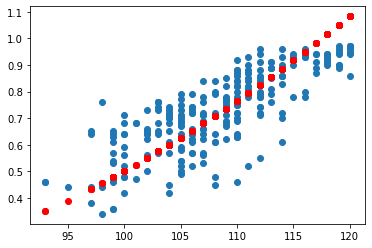

In [50]:
m, n = X.shape
theta_0 = np.random.rand(n, 1)
theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.00001,
    treshold=0.00001,
    max_iter=300000,
    lambd=10
)

print('THETA:', theta)

y_pred = np.matmul(X, theta)

plt.scatter(X[:, 1], y)
plt.scatter(X[:, 1], y_pred, color='red')

plt.show()

También se logró el mejor resultado con un polinomio grado dos. Sin embargo, los resultados estuvieron más lejanos que con la variable anterior.

### Modelo con variable CGPA

In [30]:
y = Chance_of_Admit[:TRAINING]
y = y.reshape(TRAINING,1)

X = CGPA[:TRAINING]
X = np.vstack(
    (
        np.ones(TRAINING), 
        X,
        (X**2)/1000, # Se agregaron estas dos variables para darle más precisión al modelo
        (X**3)/1000
    )
).T

THETA: [[ 0.31670234]
 [-0.02530407]
 [ 0.77055155]
 [ 0.8763274 ]]


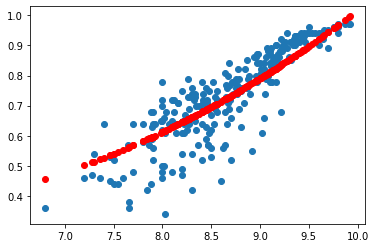

In [31]:
m, n = X.shape
theta_0 = np.random.rand(n, 1)
theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.00001,
    treshold=0.00001,
    max_iter=300000,
    lambd=10
)

print('THETA:', theta)

y_pred = np.matmul(X, theta)

plt.scatter(X[:, 1], y)
plt.scatter(X[:, 1], y_pred, color='red')

plt.show()

En este modelo se consiguieron mejores resultados con un grado tres pero todavia está muy debil la predicción.

## Modelo de tres variables

Para hacer un modelo mucho más poderoso se utilizará una combinación de las tres variables exploradas anteriormente.

In [13]:
y = Chance_of_Admit[:TRAINING]
y = y.reshape(TRAINING,1)

x1 = GRE_Score[:TRAINING]
x2 = TOEFL_Score[:TRAINING]
x3 = CGPA[:TRAINING]
X = np.vstack(
    (
        np.ones(TRAINING), 
        x1,
        (x2**2)/100,
        (x3**2)/100
    )
).T

THETA: [[ 0.80528855]
 [-0.0045156 ]
 [ 0.01107787]
 [ 0.07470661]]


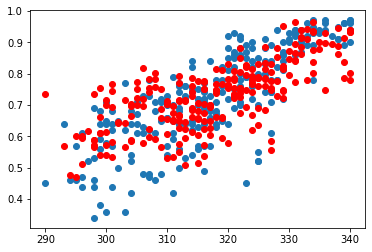

In [14]:
m, n = X.shape
theta_0 = np.random.rand(n, 1)
theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.00001,
    treshold=0.00001,
    max_iter=300000,
    lambd=10
)

print('THETA:', theta)

y_pred = np.matmul(X, theta)

plt.scatter(X[:, 1], y)
plt.scatter(X[:, 1], y_pred, color='red')

plt.show()

Podemos observar que con el uso de las tres variables simultaneamente se logró una predicción mucho más cercana a los datos de entrenamiento.

### Con set de test

Ahora usaremos el modelo creado con el set de training en el set de test.

In [26]:
y = Chance_of_Admit[TRAINING:TRAINING+TEST]
y = y.reshape(TEST,1)

x1 = GRE_Score[TRAINING:TRAINING+TEST]
x2 = TOEFL_Score[TRAINING:TRAINING+TEST]
x3 = CGPA[TRAINING:TRAINING+TEST]
X = np.vstack(
    (
        np.ones(TEST), 
        x1,
        (x2**2)/100, # Se consiguieron buenos resultados elevando estas dos variables al cuadrado
        (x3**2)/100
    )
).T

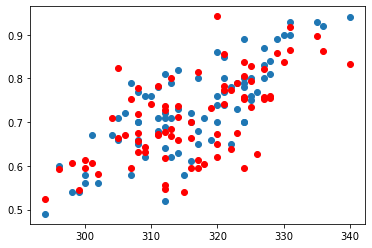

In [27]:
y_pred = np.matmul(X, theta)

plt.scatter(X[:, 1], y)
plt.scatter(X[:, 1], y_pred, color='red')

plt.show()

Como podemos ver se logró una predicción bastante buena aún en el set de training.

### Con set de cross validation

In [15]:
y = Chance_of_Admit[TRAINING+TEST:TRAINING+TEST+CROSS]
y = y.reshape(CROSS,1)

x1 = GRE_Score[TRAINING+TEST:TRAINING+TEST+CROSS]
x2 = TOEFL_Score[TRAINING+TEST:TRAINING+TEST+CROSS]
x3 = CGPA[TRAINING+TEST:TRAINING+TEST+CROSS]
X = np.vstack(
    (
        np.ones(CROSS), 
        x1,
        (x2**2)/100,
        (x3**2)/100
    )
).T

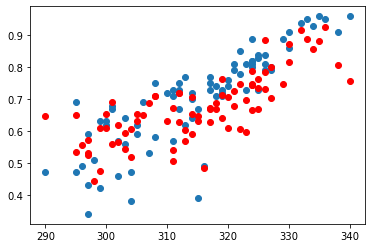

In [16]:
y_pred = np.matmul(X, theta)

plt.scatter(X[:, 1], y)
plt.scatter(X[:, 1], y_pred, color='red')

plt.show()

Como podemos ver el modelo creado también es capaz de predecir con cierta presición el set de cross validation